# Choropleth Map Construction
## Package Requirements
    - geopandas
    - pandas
    - matplotlib
## Data Source
I downloaded shp file of district of nepal from this [site](https://codefornepal.carto.com/tables/shape_files_of_districts_in_nepal/public)  
I used the labour data of nepal from the government site [moless.gov.np](https://moless.gov.np/storage/files/post_files/Nepal%20Labour%20Migration%20Report_2022.pdf)  
pdftotext linux package for converting pdf to text  
pdftk to split and rotate the pdf pages which need to be parsed

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

   descriptio  name  objectid  dist_code dist_name  shape_area  shape_len  \
0         NaN   NaN         1         56     Humla    0.563069   4.716705   
1         NaN   NaN         2         72  Darchula    0.218681   2.558935   
2         NaN   NaN         3         69   Bajhang    0.324637   2.885682   
3         NaN   NaN         4         53      Mugu    0.300001   3.600518   
4         NaN   NaN         5         67    Bajura    0.212234   2.661084   
5         NaN   NaN         6         73   Baitadi    0.138366   2.186135   
6         NaN   NaN         7         52     Dolpa    0.734227   4.514040   
7         NaN   NaN         8         54     Jumla    0.236894   2.544945   
8         NaN   NaN         9         55   Kalikot    0.151979   2.077660   
9         NaN   NaN        10         70      Doti    0.189397   2.421458   

   cartodb_id  created_at  updated_at  \
0           1  2015-02-21  2015-02-21   
1           2  2015-02-21  2015-02-21   
2           3  2015-02-21  20

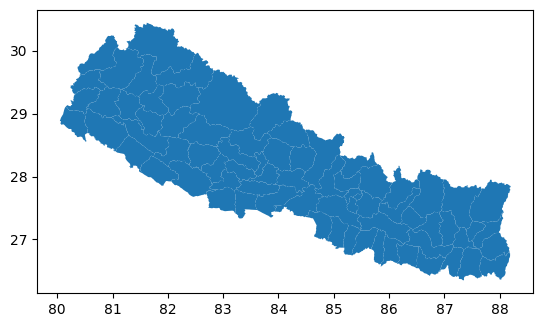

In [92]:
# Load shape file from folder and see the head
nepal = gpd.read_file('./shp-nepal-districts/shape_files_of_districts_in_nepal.shp')
print(nepal.head(10))
nepal.plot()
plt.show()

In [90]:
import re
import csv


with open('migrants_by_districts.txt') as file, open('migrants_by_districts.csv', 'w') as out_file:
    out_header_row = ['dist_name', 'Men', 'Women', 'Total'] # Header data for output
    writer = csv.writer(out_file) # create writer var to write into csv
    writer.writerow(out_header_row) # write the first header into the output csv
    count = 0
    for line in file:
        first_char_letter_match = re.search(r'"(\d+) ', line) # Match the line which has " integer district name
        if first_char_letter_match:
            # print(line)
            no_comma_line = line.replace(",", "") # Remove the comma from the line
            count+=1
            words = no_comma_line.split()        # Split the line into words, separated by whitespace
            new_row = [words[1], words[8], words[9], words[10]] # create list to store that in database
            # print("SN "+str(count)+" "+str(new_row))            
            writer.writerow(new_row)    # Write into the csv file each row
            
        

<Axes: >

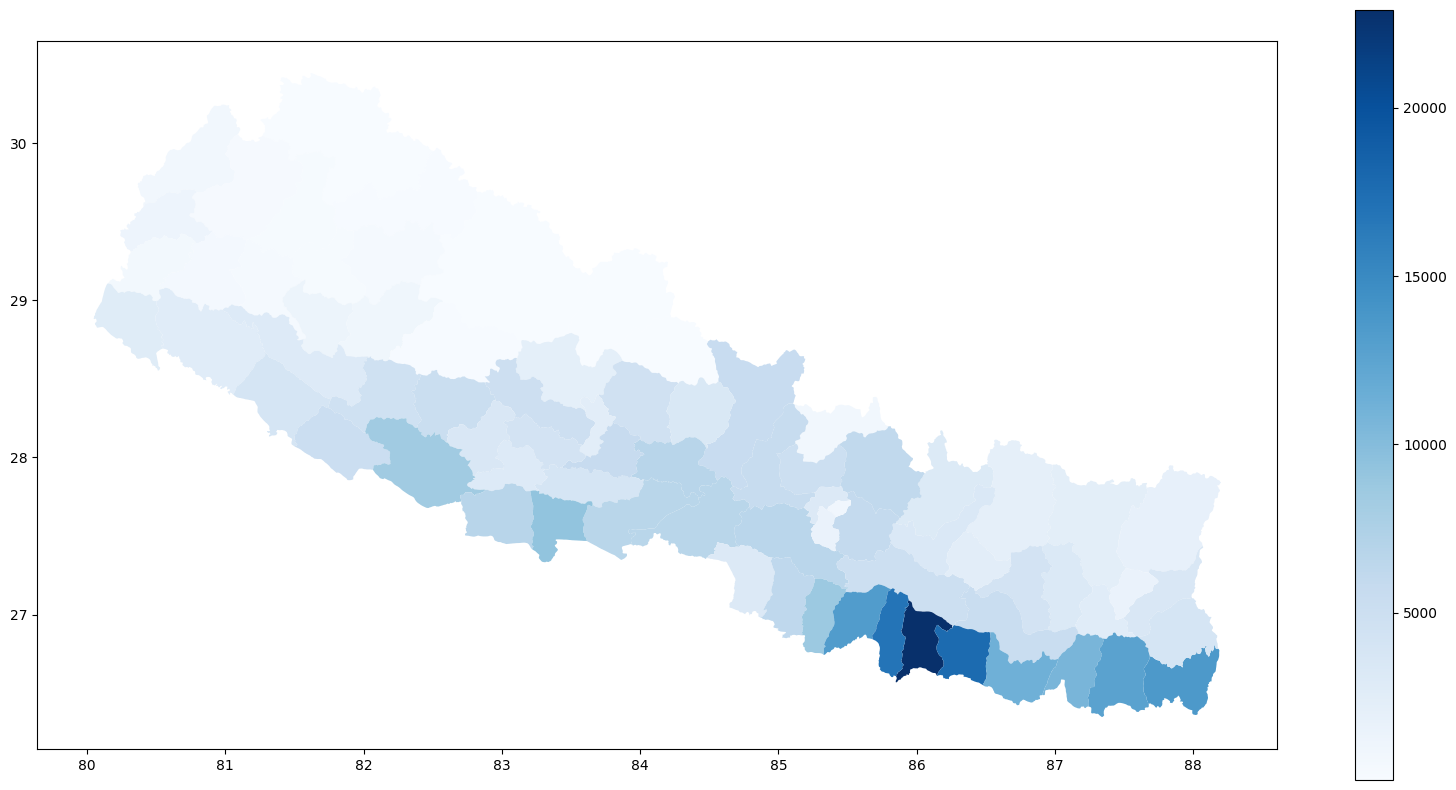

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('migrants_by_districts.csv')   # Read csv
nepal_shp = gpd.read_file('./shp-nepal-districts/shape_files_of_districts_in_nepal.shp')   # Read shp
merged = nepal_shp.merge(df, on='dist_name') # Merge two data according to the key attribute here i.e. dist_name
fig, ax = plt.subplots(figsize=(20, 10)) # Configure the zoom of the plotting
merged.plot(column='Total', cmap='Blues', legend=True, ax=ax) # Visualize the plot 
    

# Labour migrants around the world from nepal